<a href="https://colab.research.google.com/github/mohammedirfan78698/AIML-25_B15/blob/main/Hackthon_project__team_id_94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Title: Development of AI-ML based models for predicting prices of agri-horticultural commodities such as pulses and vegetable (onion, potato, onion)

In [10]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [11]:
# Step 2: Load dataset
file_path = 'agridata_csv_202110311352.csv'  # Use full path if needed
df = pd.read_csv(file_path)
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [12]:
# Step 3: Preprocessing
# Clean column names
df.columns = df.columns.str.strip().str.lower()
# Show columns
print("\nColumn Names:", df.columns.tolist())

# Drop rows with missing values
df.dropna(inplace=True)


Column Names: ['commodity_name', 'state', 'district', 'market', 'min_price', 'max_price', 'modal_price', 'date']


In [13]:
# Step 4: Filter for "onion" commodity
commodity_df = df[df['commodity_name'].str.lower().str.contains('onion')]
# Convert 'date' to datetime
commodity_df['date'] = pd.to_datetime(commodity_df['date'])

# Sort by date
commodity_df.sort_values('date', inplace=True)
commodity_df.reset_index(drop=True, inplace=True)

<ipython-input-13-cae91bcbedee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commodity_df['date'] = pd.to_datetime(commodity_df['date'])
<ipython-input-13-cae91bcbedee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commodity_df.sort_values('date', inplace=True)


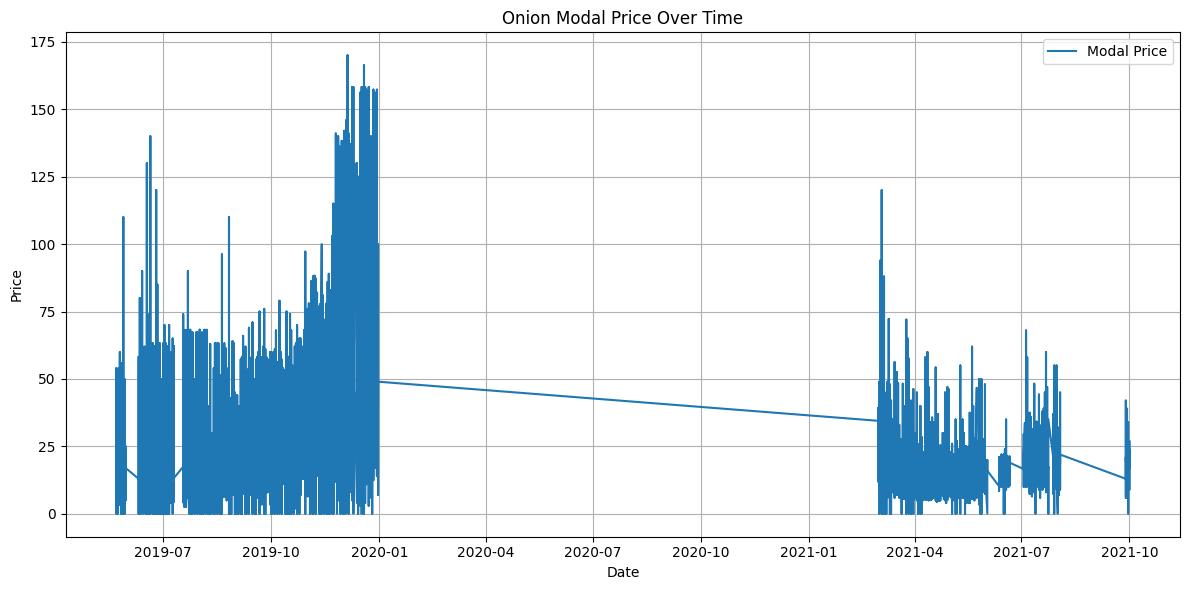

In [14]:
# Step 5: Plot time series
plt.figure(figsize=(12, 6))
plt.plot(commodity_df['date'], commodity_df['modal_price'], label='Modal Price')
plt.title('Onion Modal Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p


ARIMA Forecast (next 30 days):
45617    20.944038
45618    20.646758
45619    20.943547
45620    20.270204
45621    20.776539
45622    21.106381
45623    20.821072
45624    20.788568
45625    20.792481
45626    20.757994
45627    20.825405
45628    20.843634
45629    20.811004
45630    20.806684
45631    20.806657
45632    20.807407
45633    20.815006
45634    20.814965
45635    20.811173
45636    20.810699
45637    20.810924
45638    20.811460
45639    20.812191
45640    20.811953
45641    20.811518
45642    20.811490
45643    20.811564
45644    20.811661
45645    20.811716
45646    20.811664
Name: predicted_mean, dtype: float64


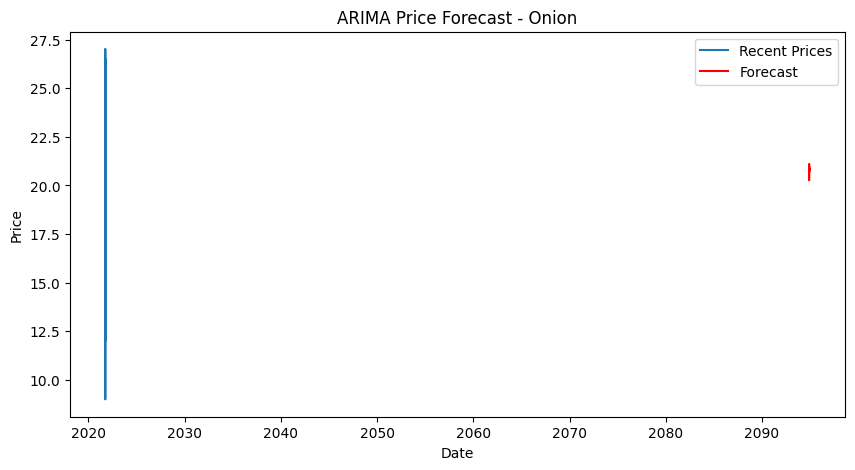

In [15]:
# Step 6: ARIMA Forecasting
# Set 'date' as index
commodity_df.set_index('date', inplace=True)
# Use modal_price as time series
ts = commodity_df['modal_price']

# Fit ARIMA model (p,d,q) = (5,1,0) is a common starting point
model = ARIMA(ts, order=(5,1,0))
arima_result = model.fit()

# Forecast next 30 days
forecast = arima_result.forecast(steps=30)
print("\nARIMA Forecast (next 30 days):")
print(forecast)

# Plot ARIMA forecast
plt.figure(figsize=(10, 5))
plt.plot(ts[-100:], label='Recent Prices')
plt.plot(forecast, label='Forecast', color='red')
plt.title("ARIMA Price Forecast - Onion")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()



<ipython-input-16-1dd628ae4b1c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commodity_df['day'] = commodity_df['date'].dt.day
<ipython-input-16-1dd628ae4b1c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commodity_df['month'] = commodity_df['date'].dt.month
<ipython-input-16-1dd628ae4b1c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or


Random Forest MSE: 106.7768196648591


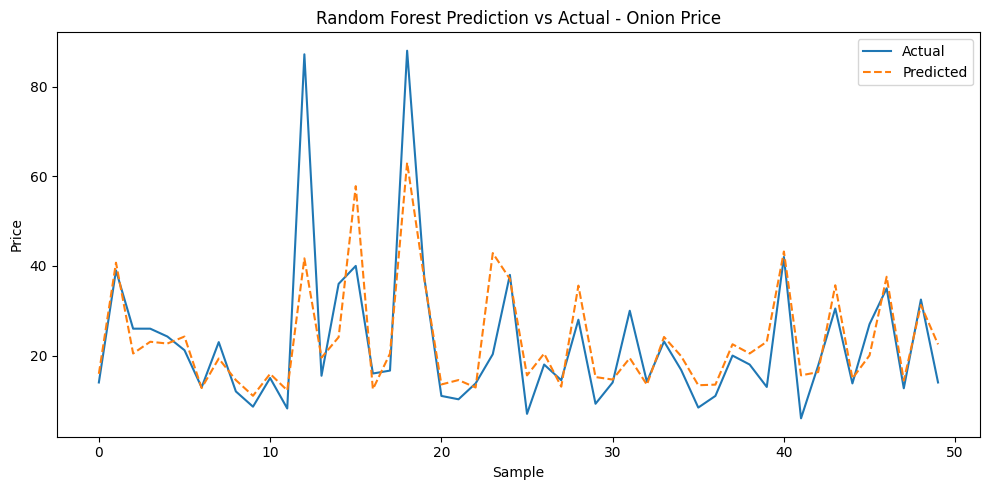

In [16]:
# Step 7: Machine Learning with Random Forest
# Reset index to make 'date' a column again
commodity_df.reset_index(inplace=True)

# Create features from date
commodity_df['day'] = commodity_df['date'].dt.day
commodity_df['month'] = commodity_df['date'].dt.month
commodity_df['year'] = commodity_df['date'].dt.year

# Define features and target
features = ['day', 'month', 'year']
target = 'modal_price'

X = commodity_df[features]
y = commodity_df[target]

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("\nRandom Forest MSE:", mse)

# Plot predicted vs actual
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred[:50], label='Predicted', linestyle='--')
plt.title("Random Forest Prediction vs Actual - Onion Price")
plt.xlabel("Sample")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()